<a href="https://colab.research.google.com/github/Louismada29/Mall_Customer_Segemntation/blob/main/Louis_Madaerdo_Sotarjua_HW1_Unsupervised_Larning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Mall_Customers.csv', delimiter=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Describtion

In [2]:
df.shape

(200, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Data Preprocessing

In [6]:
df_new = df.drop('CustomerID', axis = 1)
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Check Missing Value

In [7]:
df_new.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualization

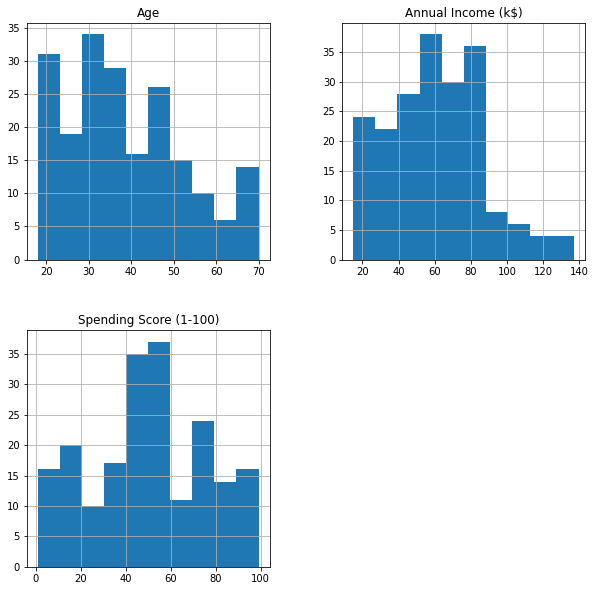

In [8]:
df_new.hist(figsize=(10,10))
plt.show()

## Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_new['Gender'] = label.fit_transform(df_new['Gender'])
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

X = df_new.astype(float).values
scaler = StandardScaler().fit(X)
X_new= scaler.transform(X)
X_new

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [11]:
X_new.shape

(200, 4)

# DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

## Mencari nilai Epsilon

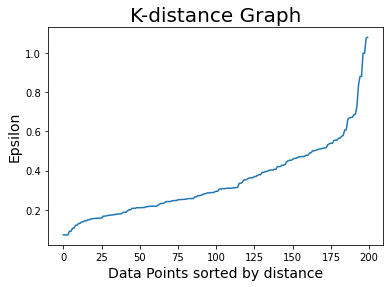

In [13]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(X_new)
distances, indices = neighbors_fit.kneighbors(X_new)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()
# nilai eps mendekati 0.6

In [14]:
db = DBSCAN(eps=0.6, min_samples=8)
db.fit(X_new)
labels = db.labels_
df_new['cluster_labels'] = labels
df_new.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
195,0,35,120,79,-1
196,0,45,126,28,-1
197,1,32,126,74,-1
198,1,32,137,18,-1
199,1,30,137,83,-1


In [15]:
print('Cluster : ', np.unique(labels))

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)
for i in range(-1, no_clusters-1):
  print('Cluster ', i, ' total member ', np.sum(np.array(labels) == i))

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Cluster :  [-1  0  1  2  3  4  5  6]
Cluster  -1  total member  111
Cluster  0  total member  8
Cluster  1  total member  18
Cluster  2  total member  19
Cluster  3  total member  9
Cluster  4  total member  8
Cluster  5  total member  17
Cluster  6  total member  10
Estimated no. of clusters: 8
Estimated no. of noise points: 111


## Removing Outliers

In [16]:
df_clean = df_new[df_new.cluster_labels	 != -1]

In [17]:
df_clean.shape

(89, 5)

# Visualization

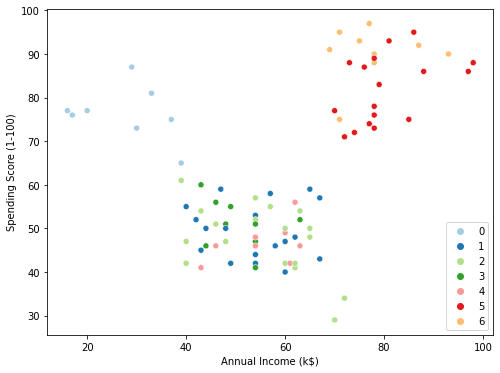

In [18]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'Annual Income (k$)'
y_val = 'Spending Score (1-100)'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_clean, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [19]:
import plotly.express as px

x_val = 'Annual Income (k$)'
y_val = 'Spending Score (1-100)'
z_val = 'Age'

fig = px.scatter_3d(df_clean, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

## visualization with noise

In [20]:
import plotly.express as px

x_val = 'Annual Income (k$)'
y_val = 'Spending Score (1-100)'
z_val = 'Age'

fig = px.scatter_3d(df_new, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

# Agglomerative Clustering

## Visualizing the working of the Dendograms

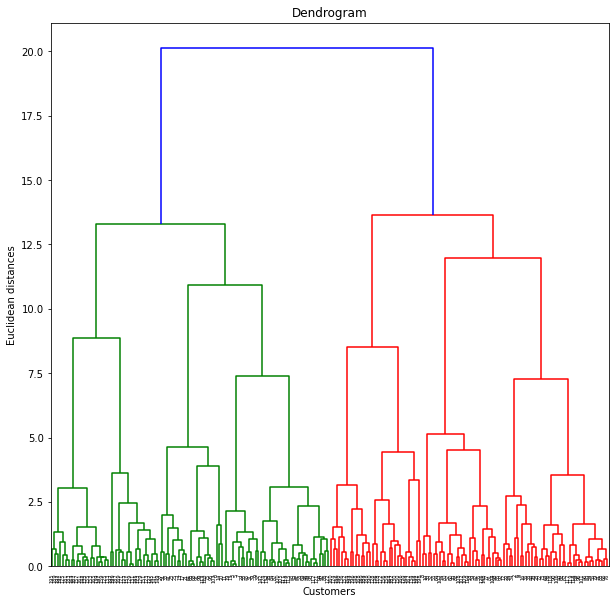

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_new, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## silhouette method
untuk mencari jumlah cluster

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

sh_list = []
for num_clusters in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = ac.fit_predict(X_new)
   
    score = silhouette_score(X_new, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.24177953745462927)
For n_clusters = 3, silhouette score is 0.24834537795671963)
For n_clusters = 4, silhouette score is 0.2632260518820244)
For n_clusters = 5, silhouette score is 0.28699413201651747)
For n_clusters = 6, silhouette score is 0.3102445968526053)
For n_clusters = 7, silhouette score is 0.34555782664693324)
For n_clusters = 8, silhouette score is 0.3788796050129373)
For n_clusters = 9, silhouette score is 0.39225805358687793)
For n_clusters = 10, silhouette score is 0.4176254448686808)


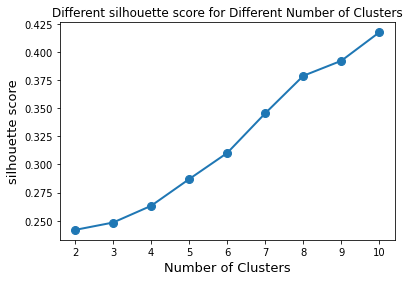

In [23]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()

## Agglomerative Clustering

In [24]:
ac = AgglomerativeClustering(n_clusters=10)
ac.fit(X_new)
labels = ac.labels_
df_new['cluster_labels'] = labels
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,9
3,0,23,16,77,8
4,0,31,17,40,9


# Visualization

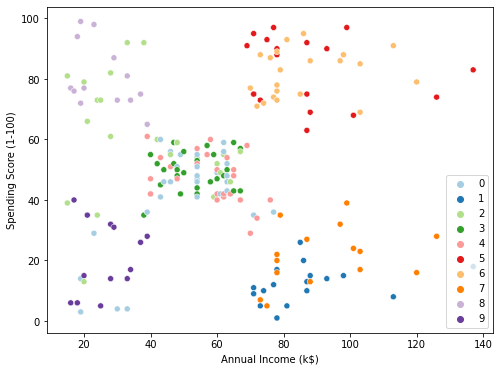

In [25]:
import seaborn as sns

plt.figure(figsize=(8,6))
x_val = 'Annual Income (k$)'
y_val = 'Spending Score (1-100)'
sns.scatterplot(x=x_val, y=y_val, hue='cluster_labels', data=df_new, palette='Paired')

plt.legend(loc='lower right')
plt.show()

In [26]:
import plotly.express as px
x_val = 'Annual Income (k$)'
y_val = 'Spending Score (1-100)'
z_val = 'Age'

fig = px.scatter_3d(df_new, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

# Discussion

In [27]:
df_out = df_new.groupby(by = 'cluster_labels').mean()[['Annual Income (k$)','Spending Score (1-100)', 'Age']].reset_index()
df_out

,cluster_labels,Annual Income (k$),Spending Score (1-100),Age
0,0,50.034483,41.344828,56.551724
1,1,86.388889,11.666667,38.833333
2,2,39.217391,59.652174,24.565217
3,3,53.240000,49.520000,54.080000
4,4,57.360000,47.120000,27.960000
5,5,87.111111,82.666667,33.277778
6,6,86.047619,81.666667,32.190476
7,7,92.333333,21.600000,44.600000
8,8,25.692308,80.538462,25.461538
9,9,26.538462,20.692308,41.538462


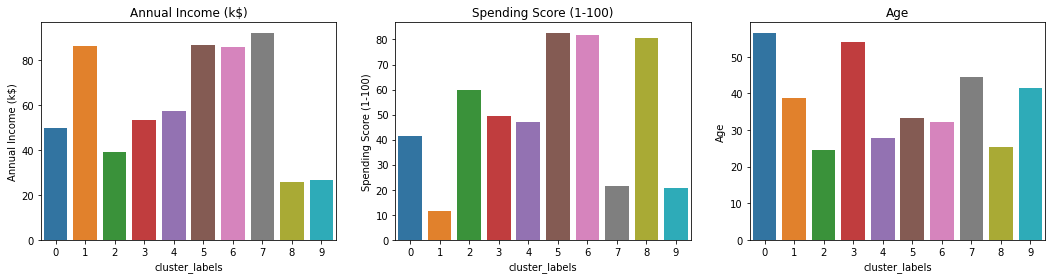

In [28]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'cluster_labels',y = 'Annual Income (k$)', data = df_out)
plt.title('Annual Income (k$)')

plt.subplot(1,3,2)
sns.barplot(x= 'cluster_labels',y = 'Spending Score (1-100)', data = df_out)
plt.title('Spending Score (1-100)')

plt.subplot(1,3,3)
sns.barplot(x= 'cluster_labels',y = 'Age', data = df_out)
plt.title('Age')
plt.show()

# Conclusion
Cluster 1,5,6,7 memiliki rata-rata Annual Income diatas 80k$

Cluster 5,6,8 memiliki rata-rata Spending score diatas 70

Cluster 0 & 3 memiliki rata-rata umur diatas 50 tahun dan memiliki annual income dibawa 60k$